# Main class for running the molecule environment

In [1]:
import gym
from gym import wrappers, logger
from molecule_agent import MoleculeAgent
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import matplotlib.pyplot as plt
from collections import deque


# TODO: Render as a main function too
# Render toggled in the main class 
# find the correct time delay
# 
# Add pop in modifications

Welcome to TEDD, the Training Environment for Drug Discovery.
In order to run the environment, you will need to input a starting molecule, a target molecule and an optimisation goal.
Step 1) Choose starting molecule: 
Input ‘1’ to choose a CARBON molecule.
Input ‘2’ to choose a RANDOM molecule.


Input:  2



Step 2) Choose target molecule: 
Input ‘1’ to SPECIFY a molecule.
Input ‘2’ to choose a RANDOM molecule.


Input:  2



Step 3) Choose optimisation goal: 
Input a number from 0 to 100.


Input:  0.5



Environment initialiased.
Agent initialiased.

Starting molecule = F
Target molecule = c1cC2C(=O)NC(=O)C2cc1
Optimisation goal = 0.5

Episode: 1, Starting State: 0.0
Action:  3
State: 0.0 
Reward: -10 
Done: False 
Info: 


RDKit ERROR: [14:59:32] Explicit valence for atom # 1 F, 2, is greater than permitted


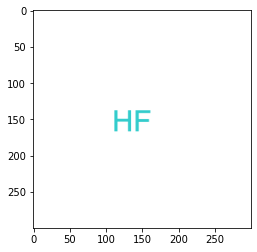

Action:  3
State: 0.0 
Reward: 0 
Done: False 
Info: 


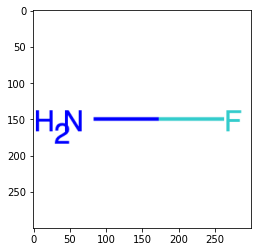

Action:  5
State: 0.0 
Reward: 0 
Done: False 
Info: 


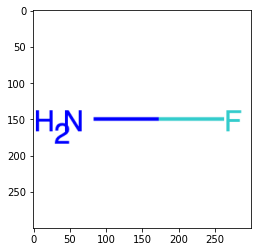

Action:  1
State: 0.6211 
Reward: 100 
Done: True 
Info: 


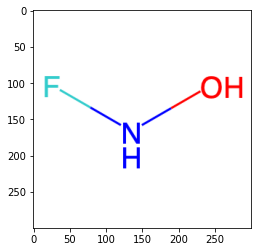

Optimisation Goal Achieved - Episode: 1, Step: 4, Similarity %: 0.6211


In [2]:
def is_valid(mol):
    try:
        molecule = Chem.MolFromSmiles(mol)
        smiles = Chem.MolToSmiles(molecule, isomericSmiles=True)
    except:
        print("Entered input is chemically invalid")
        return False
    else:
        return True


def main():
    print("Welcome to TEDD, the Training Environment for Drug Discovery.")
    print("In order to run the environment, you will need to input a starting molecule, a target molecule and an optimisation goal.")
  
    # determine starting molecule
    while True:
        print("Step 1) Choose starting molecule: \nInput ‘1’ to choose a CARBON molecule.\nInput ‘2’ to choose a RANDOM molecule.")
        starting_molecule = input("Input: ")
        if not(starting_molecule == "1" or starting_molecule == "2"):
            print("Incorrect Input.\n")
        elif starting_molecule == '1':
            starting_molecule = "C" # get carbon molecule 
            break
        else:
            starting_molecule = "1" # get random molecule 
            break

    # determine target molecule
    while True:
        print("\nStep 2) Choose target molecule: \nInput ‘1’ to SPECIFY a molecule.\nInput ‘2’ to choose a RANDOM molecule.")
        target_molecule = input("Input: ")
        if not(target_molecule == '1' or target_molecule == '2'):
            print("Incorrect Input.\n")
        elif target_molecule == '1':
            print("Input the target molecule.")
            target_molecule = input("Input: ")
            if is_valid(target_molecule): # check validity of molecule (?)
                break
            else:
                print("Incorrect Input.\n")
        else:
            target_molecule = "1" # get random molecule 
            break

    # determine optimisation goal
    while True:
        print("\nStep 3) Choose optimisation goal: \nInput a number from 0 to 100.")
        optimisation_goal = input("Input: ")
        try:
            optimisation_goal = float(optimisation_goal)
            if optimisation_goal < 0 or optimisation_goal > 100:
                print("Incorrect Input.\n")
            else:
                break
        except:
            print("Incorrect Input.\n")
    print()

    env = gym.make("gym_molecule:molecule-v0", start = starting_molecule, target = target_molecule, goal = optimisation_goal)
    print("Environment initialiased.")

    agent = MoleculeAgent(env.observation_space, env.action_space) # Create a new Molecule Agent object.
    print("Agent initialiased.\n")
    
    print("Starting molecule =", env.mol)
    print("Target molecule =", env.goal)
    print("Optimisation goal =", env.similarity)
    print()
    
    episode_count = 2
    reward = 0
    done = False
    
    for episode in range(1,5):

        if done:
            break
            
        state = env.reset()
        print("Episode: " + str(episode) + ", Starting State: " + str(state))

        for step in range(1,21):
            action = agent.act(state, reward, done)
            print("Action: ", action) 

            state_next, reward, done, info = env.step(action)
            print("State:", state_next, "\nReward:", reward, "\nDone:", done,"\nInfo: ")

            agent.remember(state, action, reward, state_next, done)
            state = state_next

            env.render()

            if done:
                print("Optimisation Goal Achieved - Episode: " + str(episode) + ", Step: " + str(step) + ", Similarity %: " + str(state))
                break  
                
    agent.save_memory()
    env.close()
            
    
if __name__ == '__main__':
    main()

# Aspirin: O=C(C)Oc1ccccc1C(=O)O
# Start with: Oc1ccccc1C

## 